In [ ]:
# Getting Python ready
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
#from ipynb.fs.full.Bernoulli import aBernoulliExperiment
import math
import textwrap
import ipynb.fs.defs.Bernoulli as bern


We will now create the procedure for an experiment whose outcomes are modeled by a Binomial RV. The function is

    aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5)

As we would expect, the experiment involves binomialParam_n sub-experiments, where each sub-experiment's outcome is modeled by a Bernoulli(binomialParam_p) RV. The outcomes of the binomialParam_n Bernoulli RVs are independent.

The outcomes modeled by the Binomial RV are the number of trials that resulted in a 1.

In [ ]:
def aBinomialExperiment(randomNumGen, binomialParam_n=5, binomialParam_p=0.5, profitLoss_Bern = [1,0]):
    
    outcomesOfBernTrails = bern.aBernoulliExperiment(randomNumGen, bernoulliParam_p=binomialParam_p, numRepeatsOfExp = 1, numTrialsInAnExp = binomialParam_n, profitLoss = profitLoss_Bern)

    #print(outcomesOfBernTrails)

    outcomeOfBinomialExp = np.sum(outcomesOfBernTrails)

    #print(outcomeOfBinomialExp)

    return outcomeOfBinomialExp

We perform one experiment and record the outcome, which is the number of trials that resulted in a 1.

In [ ]:
v_binomial_n = 100000
v_binomial_p = 0.5

outcomeOfBinomialExp = aBinomialExperiment(np.random.default_rng(718), v_binomial_n, v_binomial_p, [1,0])#, [-10,10])

print(outcomeOfBinomialExp)

In [ ]:
fig1, (ax1) = plt.subplots(nrows=1, ncols=1, sharex=True)
#histVal = ax1.hist(outcomeOfBinomialExp + 1, bins=range(0,v_binomial_n+1), density=True, align='left')

histVal = ax1.hist(outcomeOfBinomialExp + 1, density=False, align='left')

print("The histogram values are:", histVal)

ax1.set_xscale("linear")

ax1.set_xlabel("x (From Binomial Experiment)")
ax1.set_ylabel("Frequency (%) of Unique x")
#fig1.set_label("No of Trials of Bern Exp is " + str(v_numTrialsInAnExp))

We perform many experiments and record the outcome for each experiment. Specifically, we record the number of trials that resulted in a 1 in the experiment.

In [ ]:
numberOfBinomialExps = 100

v_binomial_n = 10
v_binomial_p = 0.5

rng = np.random.default_rng(7381638)

outcomeOfBinomialExps = np.ndarray((numberOfBinomialExps,1))

for i in range(numberOfBinomialExps):
    outcomeOfBinomialExps[i,:] = aBinomialExperiment(rng, v_binomial_n, v_binomial_p, [1,0])

#print(outcomeOfBinomialExps[:,:])
#print(outcomeOfBinomialExps[:,:]/v_binomial_n)

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=1, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps, density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

# print(histVal[0])
# print(histVal[0].size)

ax[0].bar(histVal[1]/v_binomial_n, histVal[0]/numberOfBinomialExps, width = 0.001)
# ax1.set_xscale("linear")
ax[0].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[0].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

ax[1].bar(histVal[1], histVal[0]/numberOfBinomialExps, width = 0.1)
# ax1.set_xscale("linear")
ax[1].set_xlabel("Number of successes as a fraction of total trials (Binomial Experiment)")
ax[1].set_ylabel(textwrap.fill("Frequency of Number of Successes", 10))

plt.tight_layout(h_pad = 5.0)

Suppose we map our Bernoulli outcomes to the set {-10,10}. Specifically, we map 0 to -10 and 1 to 10. You may think of each Bernoulli trial as a gamble in a casino that results in a profit of 10 Rupees with probability p and a loss of -10 Rupees otherwise. We will simulate the distribution of the total profit at the end of playing n gambles. The numberOfBinomialExps below may be though of as the number of gamblers.

In [54]:
numberOfBinomialExps = [100, 100]

v_binomial_n = [100000, 1000000]
v_binomial_p = 0.5
sizeofbet = [10, 1]

rng = np.random.default_rng(7381638)

print(numberOfBinomialExps[0])

outcomeOfBinomialExps_largeBet = np.ndarray((numberOfBinomialExps[0],1))

for i in range(numberOfBinomialExps[0]):
    outcomeOfBinomialExps_largeBet[i,:] = aBinomialExperiment(rng, v_binomial_n[0], v_binomial_p, [sizeofbet[0],-1 * sizeofbet[0]])

outcomeOfBinomialExps_smallBet = np.ndarray((numberOfBinomialExps[1],1))

for i in range(numberOfBinomialExps[1]):
    outcomeOfBinomialExps_smallBet[i,:] = aBinomialExperiment(rng, v_binomial_n[1], v_binomial_p, [sizeofbet[1],-1 * sizeofbet[1]])



#print(outcomeOfBinomialExps[:,:])
#print(outcomeOfBinomialExps[:,:]/v_binomial_n)

100


The histogram[1] values are: [-6500. -5090. -3680. -2270.  -860.   550.  1960.  3370.  4780.  6190.
  7600.]
The histogram[0] values are: [ 4  4  7 12 17 15 21 11  6  5  2]


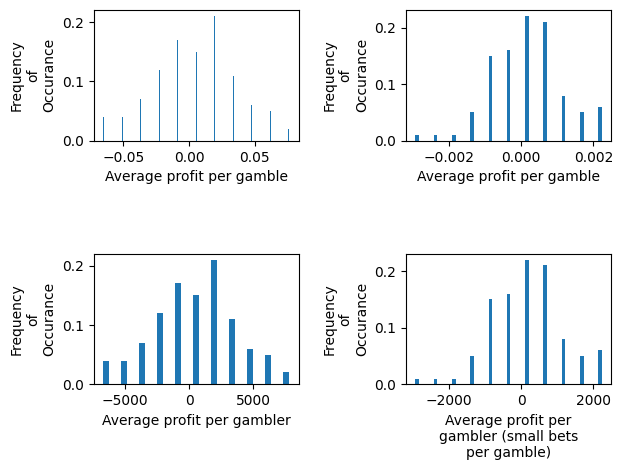

In [68]:
fig, ax = plt.subplots(nrows=2, ncols=2, sharex=False)

#histVal = np.histogram(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True)

histVal = np.histogram(outcomeOfBinomialExps_largeBet, density=False)

#histVal = ax1.hist(outcomeOfBinomialExps, bins=range(0,v_binomial_n+1), density=True, align='left')
# print("The histogram values are:", histhistVal[0].sizeVal[1])
# print("The histogram values are:", histVal[0])
# print(histVal[0].size)


histVal[0].resize(histVal[1].shape)

# print(histVal[0])
# print(histVal[0][0:histVal[0].size])

histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

print("The histogram[1] values are:", histVal[1])
print("The histogram[0] values are:", histVal[0])

# print(histVal[0])
# print(histVal[0].size)

ax[0][0].bar(histVal[1]/v_binomial_n[0], histVal[0]/numberOfBinomialExps[0], width = .001)
ax[0][0].set_xlabel(textwrap.fill("Average profit per bet (large bets per gamble)",20))
ax[0][0].set_ylabel(textwrap.fill("Frequency of Occurance", 10))

ax[1][0].bar(histVal[1], histVal[0]/numberOfBinomialExps[0], width = 500)
ax[1][0].set_xlabel(textwrap.fill("Average profit per gambler (small bets per gamble)",20))
ax[1][0].set_ylabel(textwrap.fill("Frequency of Occurance", 10))


histVal = np.histogram(outcomeOfBinomialExps_smallBet, density=False)
histVal[0].resize(histVal[1].shape)
histVal[0][1:histVal[0].size] = histVal[0][0:histVal[0].size - 1]

ax[0][1].bar(histVal[1]/v_binomial_n[1], histVal[0]/numberOfBinomialExps[1], width = .0001)
ax[0][1].set_xlabel(textwrap.fill("Average profit per bet (small bets per gamble)",20))
ax[0][1].set_ylabel(textwrap.fill("Frequency of Occurance", 10))

ax[1][1].bar(histVal[1], histVal[0]/numberOfBinomialExps[1], width = 100)
ax[1][1].set_xlabel(textwrap.fill("Average profit per gambler (small bets per gamble)",20))
ax[1][1].set_ylabel(textwrap.fill("Frequency of Occurance", 10))

plt.tight_layout(h_pad = 5.0)

Consider a country where any randomly chosen person is rich with probability p. The country has 30 states. The population of states is distributed as a Poisson RV with mean 1e5 (1 lakh)